Best and least selling


In [5]:
import pandas as pd

orders_df = pd.read_csv('orders.csv')
product_df = pd.read_excel('product.xlsx')


merged_df = pd.merge(orders_df, product_df, left_on='ID_Item', right_on='id')


grouped = merged_df.groupby(['city_name_fa', 'ID_Item', 'product_title_fa'])['Quantity_item'].sum().reset_index()


def top_bottom_products(group):
    top = group.sort_values('Quantity_item', ascending=False).head(3)
    bottom = group.sort_values('Quantity_item', ascending=True).head(3)
    return pd.concat([top, bottom])


result = grouped.groupby('city_name_fa').apply(top_bottom_products).reset_index(drop=True)


print(result[['city_name_fa', 'ID_Item', 'product_title_fa', 'Quantity_item']])


     city_name_fa  ID_Item                                   product_title_fa  \
0          آبادان   782834  دستبند طلا 18 عیار گالری طلا باران مدل پلاکدار...   
1          آبادان   787277          زیردکمه دار آستین کوتاه سی‌مرغ طرح آب‌پاش   
2          آبادان   768035  هودی زنانه فرانکلین مارشال مدل Hooded Long کد ...   
3          آبادان   731117            متر اندازه گیری کودک دکودیزاین مدل 1376   
4          آبادان   768035  هودی زنانه فرانکلین مارشال مدل Hooded Long کد ...   
...           ...      ...                                                ...   
1585          یزد   745463                      برس مناسب حمام مدل Vent-Ionen   
1586          یزد   801102        لامپ 3 وات بالب لندن مدل BLDEDROPL پایه E27   
1587          یزد   724580  حوله استخری دبلیو اند بی هوم طرح زیتون سایز 14...   
1588          یزد   724968                          اسپیکر بلوتوثی مدل Ws-819   
1589          یزد   727619             آموزش تصویری ساندویچ و پیترا نشر ریشتر   

      Quantity_item  
0    

C:\Users\Kiana\AppData\Local\Temp\ipykernel_8104\3231514708.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = grouped.groupby('city_name_fa').apply(top_bottom_products).reset_index(drop=True)


The highest and lowest income city


In [2]:
import pandas as pd

orders_df = pd.read_csv('orders.csv')


city_revenue = orders_df.groupby('city_name_fa')['Amount_Gross_Order'].sum().reset_index()


max_city = city_revenue.loc[city_revenue['Amount_Gross_Order'].idxmax()]
min_city = city_revenue.loc[city_revenue['Amount_Gross_Order'].idxmin()]


print("the highest income city:")
print(max_city)

print("\nthe highest income city:")
print(min_city)


the highest income city:
city_name_fa                   تهران
Amount_Gross_Order    152743141946.0
Name: 215, dtype: object

the highest income city:
city_name_fa          شیرین سو
Amount_Gross_Order      9174.0
Name: 509, dtype: object


Income chart

C:\Users\Kiana\AppData\Local\Temp\ipykernel_8104\2776926466.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


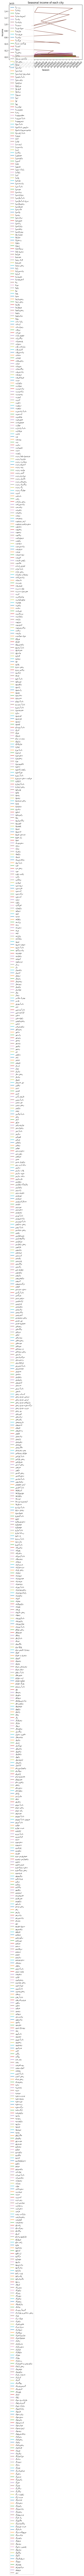

In [4]:
import matplotlib.pyplot as plt
import pandas as pd


orders_df = pd.read_csv('orders.csv')


orders_df['DateTime_CartFinalize'] = pd.to_datetime(orders_df['DateTime_CartFinalize'])
orders_df['quarter'] = orders_df['DateTime_CartFinalize'].dt.to_period('Q')


quarterly = orders_df.groupby(['city_name_fa', 'quarter'])['Amount_Gross_Order'].sum().reset_index()


for city in quarterly['city_name_fa'].unique():
    city_data = quarterly[quarterly['city_name_fa'] == city]
    plt.plot(city_data['quarter'].astype(str), city_data['Amount_Gross_Order'], label=city)

plt.xlabel('Season')
plt.ylabel('Income')
plt.title('Seasonal income of each city')
plt.legend(loc='best', fontsize='small')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()